## Info
* Data = `bloomberg_usd_idr_2012_2024_processed.csv`

In [1]:
import pandas as pd
import numpy as np
import datetime
import time

import torch
from torch import nn

import matplotlib.pyplot as plt

In [49]:
# Read data
df = pd.read_csv('bloomberg_usd_idr_2012_2024_processed.csv')

df

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,ma_close_5,ma_close_10,prev_open,prev_high,prev_low,prev_close,daily_range,gap_change,close_ma5_ratio,close_ma10_ratio
0,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,9074.000000,9070.833333,9100.0,9208.0,9063.0,9067.0,133.0,83.0,1.000661,1.001011
1,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,9094.000000,9080.000000,9150.0,9200.0,9067.0,9080.0,95.0,10.0,1.004508,1.006057
2,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,9117.333333,9087.125000,9090.0,9185.0,9090.0,9135.0,48.0,25.0,1.002157,1.005489
3,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,9136.250000,9104.375000,9160.0,9185.0,9137.0,9137.0,91.0,38.0,1.006212,1.009734
4,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,9128.000000,9106.875000,9175.0,9203.0,9112.0,9193.0,118.0,-15.0,0.996385,0.998696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-10-21,15463.0,15498.0,15431.0,15495.0,1,15560.0,-60.0,-25.0,-16.0,...,15485.000000,15518.000000,15523.0,15523.0,15447.0,15465.0,67.0,-2.0,1.000646,0.998518
3130,2024-10-22,15534.0,15572.0,15534.0,15560.0,1,15620.0,71.0,74.0,103.0,...,15506.666667,15524.000000,15463.0,15498.0,15431.0,15495.0,38.0,39.0,1.003439,1.002319
3131,2024-10-23,15590.0,15633.0,15590.0,15620.0,1,15584.0,56.0,61.0,56.0,...,15558.333333,15536.000000,15534.0,15572.0,15534.0,15560.0,43.0,30.0,1.003964,1.005407
3132,2024-10-24,15640.0,15644.0,15580.0,15584.0,1,15640.0,50.0,11.0,-10.0,...,15564.750000,15539.000000,15590.0,15633.0,15590.0,15620.0,64.0,20.0,1.001237,1.002896


In [3]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'gap_day', 'next_close',
       'open_change', 'high_change', 'low_change', 'close_change',
       'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
       'prev_close', 'daily_range', 'gap_change', 'close_ma5_ratio',
       'close_ma10_ratio'],
      dtype='object')

In [50]:
# Others Features Engineering
df['open_change_perc'] = df['open_change'] / df['prev_open']
df['high_change_perc'] = df['high_change'] / df['prev_high']
df['low_change_perc'] = df['low_change'] / df['prev_low']
df['close_change_perc'] = df['close_change'] / df['prev_close']

df['prev_daily_range'] = df['prev_high'] - df['prev_low']
df['daily_range_change'] = df['daily_range'] - df['prev_daily_range']
# df['daily_range_change_perc'] = df['daily_range_change']/df['prev_daily_range']

df['open_prev_close_change'] = df['open'] - df['prev_close']

df['volatility'] = ((df['high'] - df['low']) / df['open']) * 100
df['prev_volatility'] = ((df['prev_high'] - df['prev_low']) / df['prev_open']) * 100
df['volatility_change'] = df['volatility'] - df['prev_volatility']


In [83]:
df

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,...,open_change_perc,high_change_perc,low_change_perc,close_change_perc,prev_daily_range,daily_range_change,open_prev_close_change,volatility,prev_volatility,volatility_change
0,2012-01-02,9150.0,9200.0,9067.0,9080.0,1,9135.0,50.0,-8.0,4.0,...,0.005495,-0.000869,0.000441,0.001434,145.0,-12.0,83.0,1.453552,1.593407,-0.139855
1,2012-01-03,9090.0,9185.0,9090.0,9135.0,1,9137.0,-60.0,-15.0,23.0,...,-0.006557,-0.001630,0.002537,0.006057,133.0,-38.0,10.0,1.045105,1.453552,-0.408447
2,2012-01-04,9160.0,9185.0,9137.0,9137.0,1,9193.0,70.0,0.0,47.0,...,0.007701,0.000000,0.005171,0.000219,95.0,-47.0,25.0,0.524017,1.045105,-0.521087
3,2012-01-05,9175.0,9203.0,9112.0,9193.0,1,9095.0,15.0,18.0,-25.0,...,0.001638,0.001960,-0.002736,0.006129,48.0,43.0,38.0,0.991826,0.524017,0.467808
4,2012-01-06,9178.0,9213.0,9095.0,9095.0,3,9150.0,3.0,10.0,-17.0,...,0.000327,0.001087,-0.001866,-0.010660,91.0,27.0,-15.0,1.285683,0.991826,0.293858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-10-21,15463.0,15498.0,15431.0,15495.0,1,15560.0,-60.0,-25.0,-16.0,...,-0.003865,-0.001611,-0.001036,0.001940,76.0,-9.0,-2.0,0.433292,0.489596,-0.056304
3130,2024-10-22,15534.0,15572.0,15534.0,15560.0,1,15620.0,71.0,74.0,103.0,...,0.004592,0.004775,0.006675,0.004195,67.0,-29.0,39.0,0.244625,0.433292,-0.188668
3131,2024-10-23,15590.0,15633.0,15590.0,15620.0,1,15584.0,56.0,61.0,56.0,...,0.003605,0.003917,0.003605,0.003856,38.0,5.0,30.0,0.275818,0.244625,0.031193
3132,2024-10-24,15640.0,15644.0,15580.0,15584.0,1,15640.0,50.0,11.0,-10.0,...,0.003207,0.000704,-0.000641,-0.002305,43.0,21.0,20.0,0.409207,0.275818,0.133389


In [84]:
# # Specify the filename
# filename = 'USD_IDR_bloomberg_features_engineered.csv'

# # Write the DataFrame to a CSV file
# df.to_csv(filename, index=False)

# print(f'DataFrame written to {filename}')

DataFrame written to USD_IDR_bloomberg_features_engineered.csv


In [53]:
print(df['volatility'].mean())
print(df['volatility'].min())
print(df['volatility'].max())

0.41246361065797327
0.0
4.747880410531013


In [55]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'gap_day', 'next_close',
       'open_change', 'high_change', 'low_change', 'close_change',
       'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
       'prev_close', 'daily_range', 'gap_change', 'close_ma5_ratio',
       'close_ma10_ratio', 'open_change_perc', 'high_change_perc',
       'low_change_perc', 'close_change_perc', 'prev_daily_range',
       'daily_range_change', 'open_prev_close_change', 'volatility',
       'prev_volatility', 'volatility_change'],
      dtype='object')

## ML Model

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)  # Set a seed for reproducibility
np.random.seed(42)      # Also set a seed for NumPy if you're using it

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Do not apply scaling, using raw data directly

# Convert features and target into PyTorch tensors
X = torch.tensor(features_df.values, dtype=torch.float32)
y = torch.tensor(target_df.values, dtype=torch.float32).view(-1, 1)  # Ensure target is a 2D tensor

# Model definition
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, define the optimizer
input_size = X.shape[1]
model = LinearRegressionModel(input_size)
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Weight initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

# Sliding window training and validation
window_size = 30
all_losses = []

# Set this variable to control whether to limit the number of windows
set_limit = True  # Change this to False to process all windows
max_windows = 5  # Set your desired maximum number of windows if limiting is enabled

# Calculate the number of windows based on the dataset size
num_windows = len(X) - window_size

# If set_limit is True, apply the maximum window limit
if set_limit:
    num_windows = min(num_windows, max_windows)

for window_number in range(num_windows):
    start = window_number
    end = start + window_size
    X_train = X[start:end]
    y_train = y[start:end].view(-1, 1)
    X_val = X[end].unsqueeze(0)
    y_val = y[end].unsqueeze(0)

    model.train()
    for epoch in range(200):
        outputs = model(X_train)

        loss = nn.functional.mse_loss(outputs, y_train)  # MSE calculation

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        val_loss = nn.functional.mse_loss(y_pred, y_val)  # Calculate MSE for validation
        rmse_loss = torch.sqrt(val_loss)  # Calculate RMSE
        all_losses.append(rmse_loss.item())

    print(f"Window {window_number + 1}: Training on rows {start} to {end - 1}, validating on row {end}.")
    print(f"Predicted value: {y_pred.item():.4f}, Actual value: {y_val.item():.4f}")
    print(f"Loss for this window (RMSE): {rmse_loss.item():.4f}")

# Calculate total average loss across all windows
average_loss = sum(all_losses) / len(all_losses)
print(f'Total Average Loss across first {num_windows} windows (RMSE): {average_loss:.4f}')

Window 1: Training on rows 0 to 29, validating on row 30.
Predicted value: 9039.2627, Actual value: 9030.0000
Loss for this window (RMSE): 9.2627
Window 2: Training on rows 1 to 30, validating on row 31.
Predicted value: 9072.7510, Actual value: 9032.0000
Loss for this window (RMSE): 40.7510
Window 3: Training on rows 2 to 31, validating on row 32.
Predicted value: 9145.1250, Actual value: 9090.0000
Loss for this window (RMSE): 55.1250
Window 4: Training on rows 3 to 32, validating on row 33.
Predicted value: 9088.6914, Actual value: 9046.0000
Loss for this window (RMSE): 42.6914
Window 5: Training on rows 4 to 33, validating on row 34.
Predicted value: 9081.5625, Actual value: 9026.0000
Loss for this window (RMSE): 55.5625
Total Average Loss across first 5 windows (RMSE): 40.6785


In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)  # Set a seed for reproducibility
np.random.seed(42)      # Also set a seed for NumPy if you're using it

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Do not apply scaling, using raw data directly

# Convert features and target into PyTorch tensors
X = torch.tensor(features_df.values, dtype=torch.float32)
y = torch.tensor(target_df.values, dtype=torch.float32).view(-1, 1)  # Ensure target is a 2D tensor

# Model definition
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, define the optimizer
input_size = X.shape[1]
model = LinearRegressionModel(input_size)
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Weight initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

# Specify the parameters for predictions and gaps
num_predictions = 3  # Specify how many rows you want to predict
gap = 1  # Specify the gap (number of rows to skip after each window)
window_size = 30  # Window size for training
max_windows = 10  # Set the maximum number of windows to process
set_limit = True  # Set this to False to process all windows
all_losses = []

# Calculate the number of windows based on the dataset size
num_windows = len(X) - window_size - num_predictions

# If set_limit is True, apply the maximum window limit
if set_limit:
    num_windows = min(num_windows, max_windows)

for window_number in range(num_windows):
    start = window_number
    end = start + window_size
    X_train = X[start:end]
    y_train = y[start:end].view(-1, 1)
    
    # Prepare validation data for prediction
    X_val = X[end:end + num_predictions]
    y_val = y[end:end + num_predictions].view(-1, 1)

    model.train()
    for epoch in range(200):
        outputs = model(X_train)

        loss = nn.functional.mse_loss(outputs, y_train)  # MSE calculation

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)

        # Calculate RMSE for each predicted row and average them
        val_losses = [(torch.sqrt(nn.functional.mse_loss(y_pred[i].view(1, -1), y_val[i].view(1, -1)))).item() for i in range(num_predictions)]
        average_rmse_loss = sum(val_losses) / num_predictions  # Average RMSE for the current window
        all_losses.append(average_rmse_loss)

    print(f"Window {window_number + 1}: Training on rows {start} to {end - 1}, validating on rows {end} to {end + num_predictions - 1}.")
    print(f"Predicted values: {y_pred.squeeze().tolist()}, Actual values: {y_val.squeeze().tolist()}")
    print(f"Average Loss for this window (RMSE): {average_rmse_loss:.4f}")

    # Move to the next window based on the gap
    window_number += gap

# Calculate total average loss across all windows
total_average_loss = sum(all_losses) / len(all_losses)
print(f'Total Average Loss across first {num_windows} windows (RMSE): {total_average_loss:.4f}')

Window 1: Training on rows 0 to 29, validating on rows 30 to 32.
Predicted values: [9039.2626953125, 9072.6630859375, 9145.193359375], Actual values: [9030.0, 9032.0, 9090.0]
Average Loss for this window (RMSE): 35.0397
Window 2: Training on rows 1 to 30, validating on rows 31 to 33.
Predicted values: [9072.7509765625, 9145.146484375, 9088.291015625], Actual values: [9032.0, 9090.0, 9046.0]
Average Loss for this window (RMSE): 46.0628
Window 3: Training on rows 2 to 31, validating on rows 32 to 34.
Predicted values: [9145.125, 9088.5009765625, 9081.5732421875], Actual values: [9090.0, 9046.0, 9026.0]
Average Loss for this window (RMSE): 51.0664


Window 4: Training on rows 3 to 32, validating on rows 33 to 35.
Predicted values: [9088.69140625, 9081.5830078125, 9052.9931640625], Actual values: [9046.0, 9026.0, 9050.0]
Average Loss for this window (RMSE): 33.7559
Window 5: Training on rows 4 to 33, validating on rows 34 to 36.
Predicted values: [9081.560546875, 9052.9775390625, 9046.7119140625], Actual values: [9026.0, 9050.0, 9065.0]
Average Loss for this window (RMSE): 25.6087
Window 6: Training on rows 5 to 34, validating on rows 35 to 37.
Predicted values: [9052.955078125, 9046.896484375, 9085.857421875], Actual values: [9050.0, 9065.0, 9069.0]
Average Loss for this window (RMSE): 12.6387
Window 7: Training on rows 6 to 35, validating on rows 36 to 38.
Predicted values: [9047.099609375, 9085.9853515625, 9067.91015625], Actual values: [9065.0, 9069.0, 9118.0]
Average Loss for this window (RMSE): 28.3252
Window 8: Training on rows 7 to 36, validating on rows 37 to 39.
Predicted values: [9086.064453125, 9068.02734375, 9149.23046

## Parameter Tuning

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

torch.manual_seed(42)  # Set a seed for reproducibility
np.random.seed(42) 

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert features and target into PyTorch tensors
X = torch.tensor(features_df.values, dtype=torch.float32)
y = torch.tensor(target_df.values, dtype=torch.float32).view(-1, 1)  # Ensure target is a 2D tensor

# Model definition
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

torch.manual_seed(42)  # Set a seed for reproducibility
np.random.seed(42)

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert features and target into PyTorch tensors
X = torch.tensor(features_df.values, dtype=torch.float32)
y = torch.tensor(target_df.values, dtype=torch.float32).view(-1, 1)  # Ensure target is a 2D tensor

# Model definition
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Hyperparameters to tune
learning_rates = [0.001, 0.0005, 0.0001, 0.00005,0.00001]
batch_sizes = [8,16,32]
num_epochs = [100,150,200]
window_sizes = [60,80,100,120,140,180,220,260,300]

# Set input size based on feature columns in X
input_size = X.shape[1]
results = []

# Loop through each combination of hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in num_epochs:
            for window_size in window_sizes:
                print(f"Learning rate: {lr}, Batch size: {batch_size}, Epochs: {epochs}, Window size: {window_size}")
                
                model = LinearRegressionModel(input_size)
                optimizer = optim.SGD(model.parameters(), lr=lr)

                all_losses = []
                num_windows = len(X) - window_size

                for window_number in range(num_windows):
                    start = window_number
                    end = start + window_size
                    X_train = X[start:end]
                    y_train = y[start:end].view(-1, 1)
                    X_val = X[end:end + 3]  # Adjust for number of predictions
                    y_val = y[end:end + 3].view(-1, 1)

                    model.train()
                    for epoch in range(epochs):
                        outputs = model(X_train)

                        loss = nn.functional.mse_loss(outputs, y_train)  # MSE calculation

                        optimizer.zero_grad()
                        loss.backward()
                        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                        optimizer.step()

                    # Evaluate the model
                    model.eval()
                    with torch.no_grad():
                        y_pred = model(X_val)
                        val_loss = nn.functional.mse_loss(y_pred, y_val)  # Calculate MSE for validation
                        rmse_loss = torch.sqrt(val_loss)  # Calculate RMSE
                        all_losses.append(rmse_loss.item())

                # Calculate total average loss across all windows
                average_loss = sum(all_losses) / len(all_losses)
                print(f"Average loss: {average_loss}")
                
                # Store results with the window size
                results.append({
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'num_epochs': epochs,
                    'window_size': window_size,
                    'total_avg_loss': average_loss
                })

# Convert results to DataFrame for easier handling and analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

Learning rate: 0.001, Batch size: 8, Epochs: 100, Window size: 60


KeyboardInterrupt: 

result_df

## Sckitlearn

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# # Set a seed for reproducibility
# np.random.seed(42)

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert features and target to NumPy arrays (no need to use PyTorch tensors)
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1  # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
window_size = 360      # Window size for training
max_windows = 50      # Maximum number of windows to process
set_limit = False      # Set this to False to process all windows
all_losses = []

# Calculate the number of windows based on dataset size
num_windows = len(X) - window_size - num_predictions

# Apply maximum window limit if set
if set_limit:
    num_windows = min(num_windows, max_windows)

# Loop through each sliding window with the gap applied
window_number = 0
while window_number < num_windows:
    start = window_number
    end = start + window_size
    X_train = X[start:end]
    y_train = y[start:end]

    # Prepare validation data for prediction
    X_val = X[end:end + num_predictions]
    y_val = y[end:end + num_predictions]

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on validation data
    y_pred = model.predict(X_val)

    # Calculate RMSE for each predicted row and average them
    val_losses = [np.sqrt(mean_squared_error([y_val[i]], [y_pred[i]])) for i in range(num_predictions)]
    average_rmse_loss = sum(val_losses) / num_predictions  # Average RMSE for the current window
    all_losses.append(average_rmse_loss)

    # Print results for the current window
    print(f"Window {window_number + 1}: Training on rows {start} to {end - 1}, validating on rows {end} to {end + num_predictions - 1}.")
    print(f"Predicted values: {y_pred.tolist()}, Actual values: {y_val.tolist()}")
    print(f"Average Loss for this window (RMSE): {average_rmse_loss:.4f}")

    # Move to the next window based on the gap
    window_number += gap

# Calculate total average loss across all windows
total_average_loss = sum(all_losses) / len(all_losses)
print(f'Total Average Loss across first {num_windows} windows (RMSE): {total_average_loss:.4f}')


Window 1: Training on rows 0 to 359, validating on rows 360 to 360.
Predicted values: [9814.189781955924], Actual values: [9795.0]
Average Loss for this window (RMSE): 19.1898
Window 2: Training on rows 1 to 360, validating on rows 361 to 361.
Predicted values: [9794.218094391363], Actual values: [9805.0]
Average Loss for this window (RMSE): 10.7819
Window 3: Training on rows 2 to 361, validating on rows 362 to 362.
Predicted values: [9804.58946153817], Actual values: [9801.0]
Average Loss for this window (RMSE): 3.5895
Window 4: Training on rows 3 to 362, validating on rows 363 to 363.
Predicted values: [9799.661409091925], Actual values: [9793.0]
Average Loss for this window (RMSE): 6.6614
Window 5: Training on rows 4 to 363, validating on rows 364 to 364.
Predicted values: [9800.120219670549], Actual values: [9805.0]
Average Loss for this window (RMSE): 4.8798
Window 6: Training on rows 5 to 364, validating on rows 365 to 365.
Predicted values: [9797.84179279903], Actual values: [98

## SKlearn Tuning

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert features and target to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1  # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = [30]  # List of window sizes to test
window_sizes = list(range(10, 481, 10))

# Dictionary to store total average loss for each window size
avg_loss_by_window_size = {}

# Loop through each window size
for window_size in window_sizes:
    all_losses = []  # Reset losses for each window size

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred = model.predict(X_val)

        # Calculate RMSE for each predicted row and average them
        val_losses = [np.sqrt(mean_squared_error([y_val[i]], [y_pred[i]])) for i in range(num_predictions)]
        average_rmse_loss = sum(val_losses) / num_predictions  # Average RMSE for the current window
        all_losses.append(average_rmse_loss)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate total average loss across all windows for the current window size
    total_average_loss = sum(all_losses) / len(all_losses)
    avg_loss_by_window_size[window_size] = total_average_loss

    # Print results for the current window size
    print(f'Window size {window_size}: Total Average Loss (RMSE): {total_average_loss:.4f}')

# Print the total average losses for each window size
print("\nSummary of Total Average Losses for Each Window Size:")
for size, avg_loss in avg_loss_by_window_size.items():
    print(f"Window size {size}: {avg_loss:.4f}")


Window size 10: Total Average Loss (RMSE): 194.1770
Window size 20: Total Average Loss (RMSE): 96.5354
Window size 30: Total Average Loss (RMSE): 63.3166
Window size 40: Total Average Loss (RMSE): 53.3339
Window size 50: Total Average Loss (RMSE): 48.9804
Window size 60: Total Average Loss (RMSE): 46.8650
Window size 70: Total Average Loss (RMSE): 44.5168
Window size 80: Total Average Loss (RMSE): 43.3782
Window size 90: Total Average Loss (RMSE): 42.8632
Window size 100: Total Average Loss (RMSE): 42.2059
Window size 110: Total Average Loss (RMSE): 41.3048
Window size 120: Total Average Loss (RMSE): 40.7854
Window size 130: Total Average Loss (RMSE): 40.3773
Window size 140: Total Average Loss (RMSE): 40.0184
Window size 150: Total Average Loss (RMSE): 39.7303
Window size 160: Total Average Loss (RMSE): 39.5901
Window size 170: Total Average Loss (RMSE): 39.4722
Window size 180: Total Average Loss (RMSE): 39.5504
Window size 190: Total Average Loss (RMSE): 39.5130
Window size 200: Tot

### Features adjustment

In [25]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'gap_day', 'next_close',
       'open_change', 'high_change', 'low_change', 'close_change',
       'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 'prev_low',
       'prev_close', 'daily_range', 'gap_change', 'close_ma5_ratio',
       'close_ma10_ratio'],
      dtype='object')

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop the 'date' column and separate 'next_close' as the target variable
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert features and target to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1  # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
# window_sizes = [30]  # List of window sizes to test
window_sizes = [100,120,140]

# Dictionary to store total average loss for each window size
avg_loss_by_window_size = {}

# Loop through each window size
for window_size in window_sizes:
    all_losses = []  # Reset losses for each window size

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred = model.predict(X_val)

        # Calculate RMSE for each predicted row and average them
        val_losses = [np.sqrt(mean_squared_error([y_val[i]], [y_pred[i]])) for i in range(num_predictions)]
        average_rmse_loss = sum(val_losses) / num_predictions  # Average RMSE for the current window
        all_losses.append(average_rmse_loss)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate total average loss across all windows for the current window size
    total_average_loss = sum(all_losses) / len(all_losses)
    avg_loss_by_window_size[window_size] = total_average_loss

    # Print results for the current window size
    print(f'Window size {window_size}: Total Average Loss (RMSE): {total_average_loss:.4f}')

# Print the total average losses for each window size
print("\nSummary of Total Average Losses for Each Window Size:")
for size, avg_loss in avg_loss_by_window_size.items():
    print(f"Window size {size}: {avg_loss:.4f}")


Window size 100: Total Average Loss (RMSE): 42.2059
Window size 120: Total Average Loss (RMSE): 40.7854
Window size 140: Total Average Loss (RMSE): 40.0184

Summary of Total Average Losses for Each Window Size:
Window size 100: 42.2059
Window size 120: 40.7854
Window size 140: 40.0184


## Linear Regression ML (Latest Model)

In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df.drop(['date', 'next_close'], axis=1)
target_df = df['next_close']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = 50      # Maximum number of windows to process
set_limit = False     # Set this to False to process all windows

# Define list of window sizes
window_sizes = list(range(100, 3101, 10))

# List to store results
results = []

# Loop through each window size
for window_size in window_sizes:

    # Initiate lists to store RMSEs and percentages
    all_val_rmse = []
    all_val_rmse_perc = []
    all_train_rmse = []
    all_train_rmse_perc = []

    # Calculate the number of windows based on dataset size
    num_windows = len(X) - window_size - num_predictions

    # Apply maximum window limit if set
    if set_limit:
        num_windows = min(num_windows, max_windows)

    # Loop through each sliding window with the gap applied
    window_number = 0
    while window_number < num_windows:
        start = window_number
        end = start + window_size
        X_train = X[start:end]
        y_train = y[start:end]

        # Prepare validation data for prediction
        X_val = X[end:end + num_predictions]
        y_val = y[end:end + num_predictions]

        # Initialize and fit the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on validation data
        y_pred_val = model.predict(X_val)
        # Predict on training data
        y_pred_train = model.predict(X_train)

        # Calculate RMSE and RMSE percentage for validation
        mse_val = np.mean((y_val - y_pred_val) ** 2)
        rmse_val = np.sqrt(mse_val)
        rmse_val_perc = (rmse_val / y_val)[0] * 100  # Convert to percentage

        # Calculate RMSE for training
        mse_train = np.mean((y_train - y_pred_train) ** 2)
        rmse_train = np.sqrt(mse_train)
        rmse_train_perc = (rmse_train / y_train).mean() * 100  # Convert to percentage

        # Append RMSEs and percentage errors
        all_val_rmse.append(rmse_val)
        all_val_rmse_perc.append(rmse_val_perc)
        all_train_rmse.append(rmse_train)
        all_train_rmse_perc.append(rmse_train_perc)

        # Move to the next window based on the gap
        window_number += gap

    # Calculate average, max, min, and variance for validation and training RMSEs, percentages
    avg_val_rmse = np.mean(all_val_rmse)
    min_val_rmse = min(all_val_rmse)
    max_val_rmse = max(all_val_rmse)
    var_val_rmse = np.var(all_val_rmse)

    avg_val_rmse_perc = np.mean(all_val_rmse_perc)
    min_val_rmse_perc = min(all_val_rmse_perc)
    max_val_rmse_perc = max(all_val_rmse_perc)
    var_val_rmse_perc = np.var(all_val_rmse_perc)

    avg_train_rmse = np.mean(all_train_rmse)
    min_train_rmse = min(all_train_rmse)
    max_train_rmse = max(all_train_rmse)
    var_train_rmse = np.var(all_train_rmse)

    avg_train_rmse_perc = np.mean(all_train_rmse_perc)
    min_train_rmse_perc = min(all_train_rmse_perc)
    max_train_rmse_perc = max(all_train_rmse_perc)
    var_train_rmse_perc = np.var(all_train_rmse_perc)

    # Append results to the list
    results.append({
        'window_size': window_size,
        'min_val_rmse': min_val_rmse,
        'max_val_rmse': max_val_rmse,
        'avg_val_rmse': avg_val_rmse,
        'var_val_rmse': var_val_rmse,
        'min_val_rmse_perc': min_val_rmse_perc,
        'max_val_rmse_perc': max_val_rmse_perc,
        'avg_val_rmse_perc': avg_val_rmse_perc,
        'var_val_rmse_perc': var_val_rmse_perc,
        'min_train_rmse': min_train_rmse,
        'max_train_rmse': max_train_rmse,
        'avg_train_rmse': avg_train_rmse,
        'var_train_rmse': var_train_rmse,
        'min_train_rmse_perc': min_train_rmse_perc,
        'max_train_rmse_perc': max_train_rmse_perc,
        'avg_train_rmse_perc': avg_train_rmse_perc,
        'var_train_rmse_perc': var_train_rmse_perc,
    })

    # Print results for the current window size
    print(f'Window size {window_size} | Avg Training RMSE: {avg_train_rmse_perc:.3f}%, Avg Training RMSE: {avg_train_rmse:.3f}, Var RMSE: {var_train_rmse_perc:.3f}')
    print(f'Window size {window_size} | Avg Validation RMSE: {avg_val_rmse_perc:.3f}%, Avg Validation RMSE: {avg_val_rmse:.3f}, Var RMSE: {var_val_rmse_perc:.3f}')

# Convert results to a DataFrame
results_summary = pd.DataFrame(results)

# Print the resulting DataFrame
print("\nSummary of RMSE Results for Each Window Size:")
results_summary

Window size 400 | Avg Training RMSE: 0.367%, Avg Training RMSE: 49.379, Var RMSE: 0.008
Window size 400 | Avg Validation RMSE: 0.297%, Avg Validation RMSE: 41.366, Var RMSE: 0.158

Summary of RMSE Results for Each Window Size:


,window_size,min_val_rmse,max_val_rmse,avg_val_rmse,var_val_rmse,min_val_rmse_perc,max_val_rmse_perc,avg_val_rmse_perc,var_val_rmse_perc,min_train_rmse,max_train_rmse,avg_train_rmse,var_train_rmse,min_train_rmse_perc,max_train_rmse_perc,avg_train_rmse_perc,var_train_rmse_perc
0,400,0.004285,1289.030691,41.366063,3186.060005,0.000027,7.905739,0.296669,0.1577,26.493999,78.366195,49.378681,164.640823,0.197585,0.541958,0.367419,0.008309


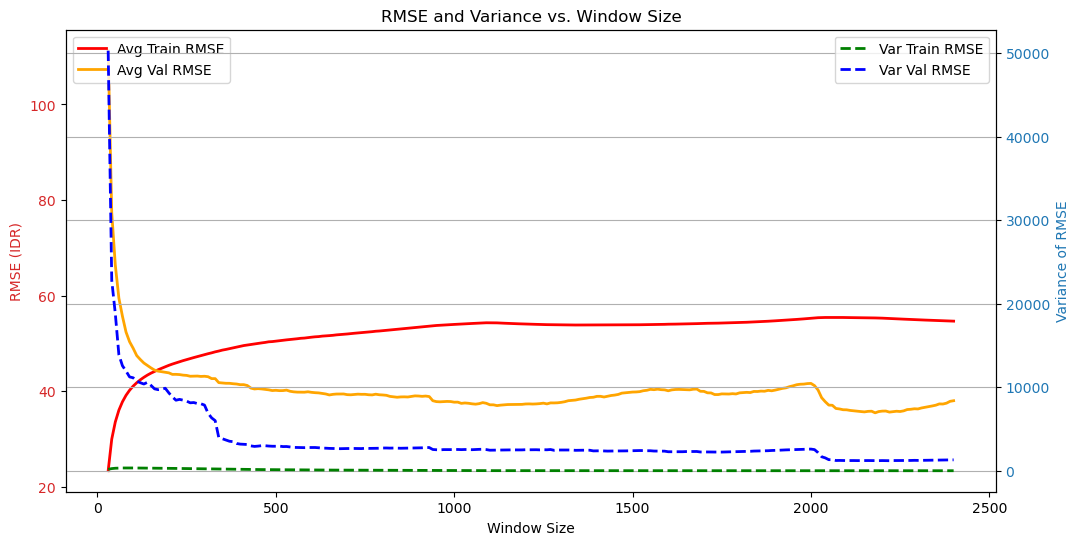

In [80]:
import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Variance
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (IDR)', color=color)

    # Plot average RMSE as lines without points
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse'].values, 
              label='Avg Train RMSE', color='red', linewidth=2)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse'].values, 
              label='Avg Val RMSE', color='orange', linewidth=2)

    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for variance
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Variance of RMSE', color=color)  # Set the label for the second Y axis

    # Plot variance of RMSE as lines without points
    ax2.plot(results_summary['window_size'].values, results_summary['var_train_rmse'].values, 
             label='Var Train RMSE', color='green', linestyle='--', linewidth=2)
    ax2.plot(results_summary['window_size'].values, results_summary['var_val_rmse'].values, 
             label='Var Val RMSE', color='blue', linestyle='--', linewidth=2)

    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Variance vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

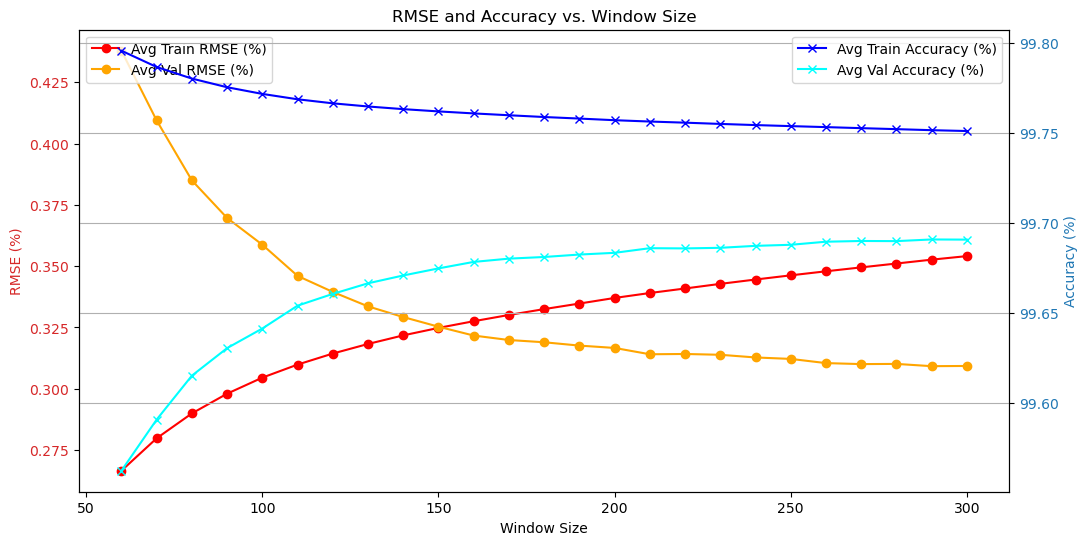

In [57]:
#### Keep this ###

import matplotlib.pyplot as plt

# Ensure you have results_summary populated before running this code
if not results_summary.empty:
    # Plotting RMSE and Accuracy
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # RMSE Plot
    color = 'tab:red'
    ax1.set_xlabel('Window Size')
    ax1.set_ylabel('RMSE (%)', color=color)
    ax1.plot(results_summary['window_size'].values, results_summary['avg_train_rmse_perc'].values, label='Avg Train RMSE (%)', color='red', marker='o')
    ax1.plot(results_summary['window_size'].values, results_summary['avg_val_rmse_perc'].values, label='Avg Val RMSE (%)', color='orange', marker='o')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Accuracy Plot
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy (%)', color=color)
    ax2.plot(results_summary['window_size'].values, results_summary['avg_train_accuracy'].values, label='Avg Train Accuracy (%)', color='blue', marker='x')
    ax2.plot(results_summary['window_size'].values, results_summary['avg_val_accuracy'].values, label='Avg Val Accuracy (%)', color='cyan', marker='x')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('RMSE and Accuracy vs. Window Size')
    plt.grid()
    plt.show()
else:
    print("Results summary is empty.")

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import itertools
import sys

# Redirect output to a file
log_file_path = 'feature_selection_log.txt'
with open(log_file_path, 'w') as log_file:
    # Save the original stdout
    original_stdout = sys.stdout
    # Redirect stdout to the log file
    sys.stdout = log_file

    # Your existing code goes here
    # Drop the 'date' column and separate 'next_close' as the target variable
    features_df = df.drop(['date', 'next_close'], axis=1)
    target_df = df['next_close']

    # Convert features and target to NumPy arrays
    X_full = features_df.values
    y = target_df.values

    # Specify parameters for the sliding window approach
    num_predictions = 1  # Number of rows to predict
    gap = 1               # Gap (number of rows to skip after each window)
    max_windows = 50      # Maximum number of windows to process
    set_limit = False     # Set this to False to process all windows

    # Define list of window sizes
    window_sizes = [100, 120, 140]

    # Dictionary to store total average loss for each feature combination
    avg_loss_by_feature_combination = {}

    # Get all feature names
    feature_names = features_df.columns.tolist()

    # Specify features to always include
    mandatory_features = [
        'open', 'high', 'low', 'close', 'gap_day',
        'open_change', 'high_change', 'low_change', 'close_change',
        'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 
        'prev_low', 'prev_close'
    ]

    # Identify optional features (those not in mandatory_features)
    optional_features = [f for f in feature_names if f not in mandatory_features]

    # Generate all possible combinations of optional features
    for r in range(len(optional_features) + 1):  # from 0 to all optional features
        for combination in itertools.combinations(optional_features, r):
            # Create a features DataFrame for the current combination, including mandatory features
            features_subset = mandatory_features + list(combination)
            features_subset_df = features_df[features_subset]
            X = features_subset_df.values
            print(f"Features: {features_subset}")  # Log feature combination
            
            # Dictionary to store average loss for each window size for the current combination
            avg_loss_by_window_size = {}

            # Loop through each window size
            for window_size in window_sizes:
                print(f"Window size: {window_size}")  # Log window size
                all_losses = []  # Reset losses for each window size

                # Calculate the number of windows based on dataset size
                num_windows = len(X) - window_size - num_predictions

                # Apply maximum window limit if set
                if set_limit:
                    num_windows = min(num_windows, max_windows)

                # Loop through each sliding window with the gap applied
                window_number = 0
                while window_number < num_windows:
                    start = window_number
                    end = start + window_size
                    X_train = X[start:end]
                    y_train = y[start:end]

                    # Prepare validation data for prediction
                    X_val = X[end:end + num_predictions]
                    y_val = y[end:end + num_predictions]

                    # Ensure there's validation data
                    if len(X_val) == 0 or len(y_val) == 0:
                        window_number += gap
                        continue  # Skip to the next window if no validation data

                    # Initialize and fit the model
                    model = LinearRegression()
                    model.fit(X_train, y_train)

                    # Predict on validation data
                    y_pred = model.predict(X_val)

                    # Calculate RMSE for each predicted row and average them
                    val_losses = [np.sqrt(mean_squared_error([y_val[i]], [y_pred[i]])) for i in range(num_predictions)]
                    average_rmse_loss = sum(val_losses) / num_predictions  # Average RMSE for the current window
                    all_losses.append(average_rmse_loss)

                    # Move to the next window based on the gap
                    window_number += gap

                # Calculate total average loss across all windows for the current window size
                if len(all_losses) > 0:  # Check if there are any losses to average
                    total_average_loss = sum(all_losses) / len(all_losses)
                    avg_loss_by_window_size[window_size] = total_average_loss
                    print(f"Average Loss: {total_average_loss}")  # Log average loss
                else:
                    avg_loss_by_window_size[window_size] = float('inf')  # Assign a large value to indicate failure
                    print(f"No valid windows for features: {features_subset} with window size: {window_size}")

            # Store the average losses for this combination
            avg_loss_by_feature_combination[tuple(features_subset)] = avg_loss_by_window_size

    # Print the summary of total average losses for each feature combination
    print("\nSummary of Total Average Losses for Each Feature Combination:")
    for combination, losses in avg_loss_by_feature_combination.items():
        print(f"\nFeatures: {combination}")
        for size, avg_loss in losses.items():
            print(f"  Window size {size}: Total Average Loss (RMSE): {avg_loss:.4f}")

    # Restore original stdout
    sys.stdout = original_stdout

In [1]:
avg_loss_by_feature_combination

NameError: name 'avg_loss_by_feature_combination' is not defined

In [ ]:
pd.set_option('display.max_rows', None)

In [22]:
avg_loss_by_window_size

{10: 194.17698137351996,
 20: 96.53544481240068,
 30: 63.31657476106998,
 40: 53.33394054308831,
 50: 48.98042176215375,
 60: 46.86503411334485,
 70: 44.51676947087083,
 80: 43.37824557944274,
 90: 42.86321041306239,
 100: 42.20585314920989,
 110: 41.30477581171551,
 120: 40.78541574327953,
 130: 40.37734828511816,
 140: 40.01843511011217,
 150: 39.7303068453276,
 160: 39.5900942207316,
 170: 39.472206195868424,
 180: 39.55035138273619,
 190: 39.512999838799765,
 200: 39.491484761066936,
 210: 39.40053983882847,
 220: 39.37699771445899,
 230: 39.40713406296321,
 240: 39.50085803187657,
 250: 39.53879762944276,
 260: 39.494410888000296,
 270: 39.371767220022654,
 280: 39.40946772276135,
 290: 39.44674640286306,
 300: 39.5063193390802,
 310: 39.44356945248117,
 320: 39.38684903598957,
 330: 39.47042659132797,
 340: 39.29199232571365,
 350: 39.389643880783495,
 360: 39.40009416116259,
 370: 39.41477306887975,
 380: 39.45331945369153,
 390: 39.47762607698437,
 400: 39.47724692771412,
 410:

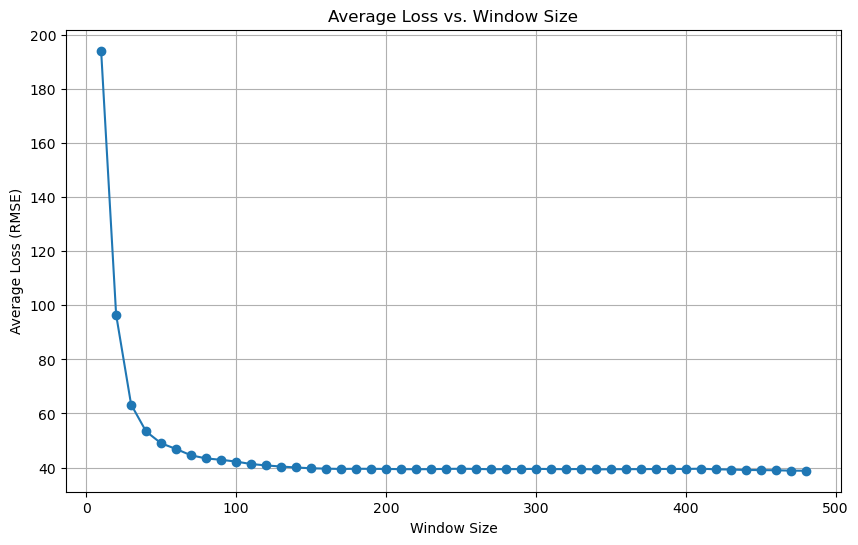

In [23]:
# Extract data for plotting
window_sizes = list(avg_loss_by_window_size.keys())
avg_losses = list(avg_loss_by_window_size.values())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, avg_losses, marker='o', linestyle='-')
plt.xlabel('Window Size')
plt.ylabel('Average Loss (RMSE)')
plt.title('Average Loss vs. Window Size')
plt.grid(True)
plt.show()

## to check

In [31]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data_file.csv')  # Load your DataFrame here

# Filter rows where 'gap_day' is greater than 5
filtered_rows = df[df['gap_day'] > 5]

# Find the index of the filtered rows
indices = filtered_rows.index

# Get the filtered rows and the next row
result = pd.concat([filtered_rows, df.loc[indices + 1]])

# Sort the result by index
result = result.sort_index()

# Display the result
result

,date,open,high,low,close,gap_day,next_close,open_change,high_change,low_change,close_change,ma_close_5,ma_close_10,prev_open,prev_high,prev_low,prev_close,daily_range,gap_change,close_ma5_ratio,close_ma10_ratio
406,2013-08-06,10280.0,10285.0,10280.0,10285.0,6,10290.0,5.0,-3.0,5.0,0.0,10285.000000,10279.000000,10275.0,10288.0,10275.0,10285.0,5.0,-5.0,1.000000,1.000584
407,2013-08-12,10270.0,10293.0,10270.0,10290.0,1,10290.0,-10.0,8.0,-10.0,5.0,10290.000000,10287.500000,10280.0,10285.0,10280.0,10285.0,23.0,-15.0,1.000000,1.000243
640,2014-07-25,11573.0,11616.0,11530.0,11578.0,6,11580.0,10.0,47.0,17.0,13.0,11564.600000,11602.250000,11563.0,11569.0,11513.0,11565.0,86.0,8.0,1.001159,0.997910
641,2014-07-31,11575.0,11580.0,11575.0,11580.0,1,11803.0,2.0,-36.0,45.0,2.0,11580.000000,11566.600000,11573.0,11616.0,11530.0,11578.0,5.0,-3.0,1.000000,1.001159
882,2015-07-15,13330.0,13367.0,13328.0,13346.0,7,13378.0,25.0,17.0,23.0,8.0,13328.666667,13333.375000,13305.0,13350.0,13305.0,13338.0,39.0,-8.0,1.001300,1.000947
883,2015-07-22,13350.0,13384.0,13341.0,13378.0,1,13421.0,20.0,17.0,13.0,32.0,13378.000000,13341.000000,13330.0,13367.0,13328.0,13346.0,43.0,4.0,1.000000,1.002773
1119,2016-07-01,13213.0,13213.0,13130.0,13138.0,10,13103.0,35.0,-7.0,-40.0,-82.0,13207.600000,13244.250000,13178.0,13220.0,13170.0,13220.0,83.0,-7.0,0.994730,0.991978
1120,2016-07-11,13113.0,13125.0,13100.0,13103.0,1,13120.0,-100.0,-88.0,-30.0,-35.0,13103.000000,13103.000000,13213.0,13213.0,13130.0,13138.0,25.0,-25.0,1.000000,1.000000
1355,2017-06-22,13308.0,13328.0,13300.0,13328.0,11,13368.0,0.0,6.0,10.0,9.0,13306.250000,13298.125000,13308.0,13322.0,13290.0,13319.0,28.0,-11.0,1.001635,1.002247
1356,2017-07-03,13300.0,13374.0,13300.0,13368.0,1,13364.0,-8.0,46.0,0.0,40.0,13368.000000,13368.000000,13308.0,13328.0,13300.0,13328.0,74.0,-28.0,1.000000,1.000000


In [34]:
import pandas as pd

# Assuming df is your DataFrame
# Filter for rows with gap_day > 5
filtered_df = df[df['gap_day'] > 5]

# Initialize a list to hold results
results = []

# Loop through the filtered DataFrame to get pairs of consecutive rows
for i in range(len(filtered_df) - 1):
    # Get the current and next row
    current_row = filtered_df.iloc[i]
    next_row = filtered_df.iloc[i + 1]

    # Calculate percentage differences based on the current row
    percent_change = {
        'gap_day': current_row['gap_day'],
        'open_percent_change': ((next_row['open'] - current_row['open']) / current_row['open']) * 100,
        'high_percent_change': ((next_row['high'] - current_row['high']) / current_row['high']) * 100,
        'low_percent_change': ((next_row['low'] - current_row['low']) / current_row['low']) * 100,
        'close_percent_change': ((next_row['close'] - current_row['close']) / current_row['close']) * 100,
    }
    results.append(percent_change)

# Create a DataFrame from the results
percent_changes_df = pd.DataFrame(results)

# Display the result
percent_changes_df

,gap_day,open_percent_change,high_percent_change,low_percent_change,close_percent_change
0,6,12.577821,12.941176,12.159533,12.571706
1,6,15.181889,15.074036,15.594102,15.270340
2,7,-0.877719,-1.152091,-1.485594,-1.558519
3,10,0.718989,0.870355,1.294745,1.446187
4,11,4.223024,4.621849,4.285714,4.516807
5,13,3.677001,3.377797,2.775775,2.462312
6,10,2.607789,2.518210,3.191863,3.061725
7,6,-0.420197,-0.534578,-0.577838,-0.577838
8,6,-3.355339,-3.306347,-2.974359,-2.919658
9,6,1.683099,2.040386,1.754757,2.105930


In [10]:
pd.set_option('display.max_rows', 40)

In [5]:
pd.set_option('display.max_columns', 25)

In [42]:
# Select only numeric columns for calculations
numeric_df = df.select_dtypes(include='number')

# Calculate descriptive statistics
stats = numeric_df.describe().T[['min', 'max', 'mean', 'std', '50%']].rename(columns={'50%': 'median'})
stats['variance'] = numeric_df.var()

# Calculate correlation with 'next_close'
correlations = numeric_df.corr()['next_close'].drop('next_close')

# Combine stats and correlations into one DataFrame
stats['correlation_with_next_close'] = correlations

# Display the results
stats

/home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,min,max,mean,std,median,variance,correlation_with_next_close
open,8895.000000,1.650500e+04,1.339251e+04,1856.820019,13919.000000,3.447781e+06,0.999159
high,8960.000000,1.662500e+04,1.342463e+04,1854.367566,13946.500000,3.438679e+06,0.999360
low,8875.000000,1.649500e+04,1.337119e+04,1857.384269,13881.500000,3.449876e+06,0.999354
close,8935.000000,1.657500e+04,1.339628e+04,1856.472401,13914.000000,3.446490e+06,0.999562
gap_day,1.000000,1.300000e+01,1.494257e+00,1.008011,1.000000,1.016086e+00,0.021391
next_close,8935.000000,1.657500e+04,1.339840e+04,1855.335477,13915.000000,3.442270e+06,NaN
open_change,-403.000000,6.620000e+02,2.081047e+00,56.256876,4.000000,3.164836e+03,-0.000009
high_change,-412.000000,6.890000e+02,2.053287e+00,54.433314,2.000000,2.962986e+03,-0.000435
low_change,-439.000000,6.620000e+02,2.086790e+00,55.678419,5.000000,3.100086e+03,-0.000975
close_change,-452.000000,6.900000e+02,2.097320e+00,54.904389,2.000000,3.014492e+03,-0.002884


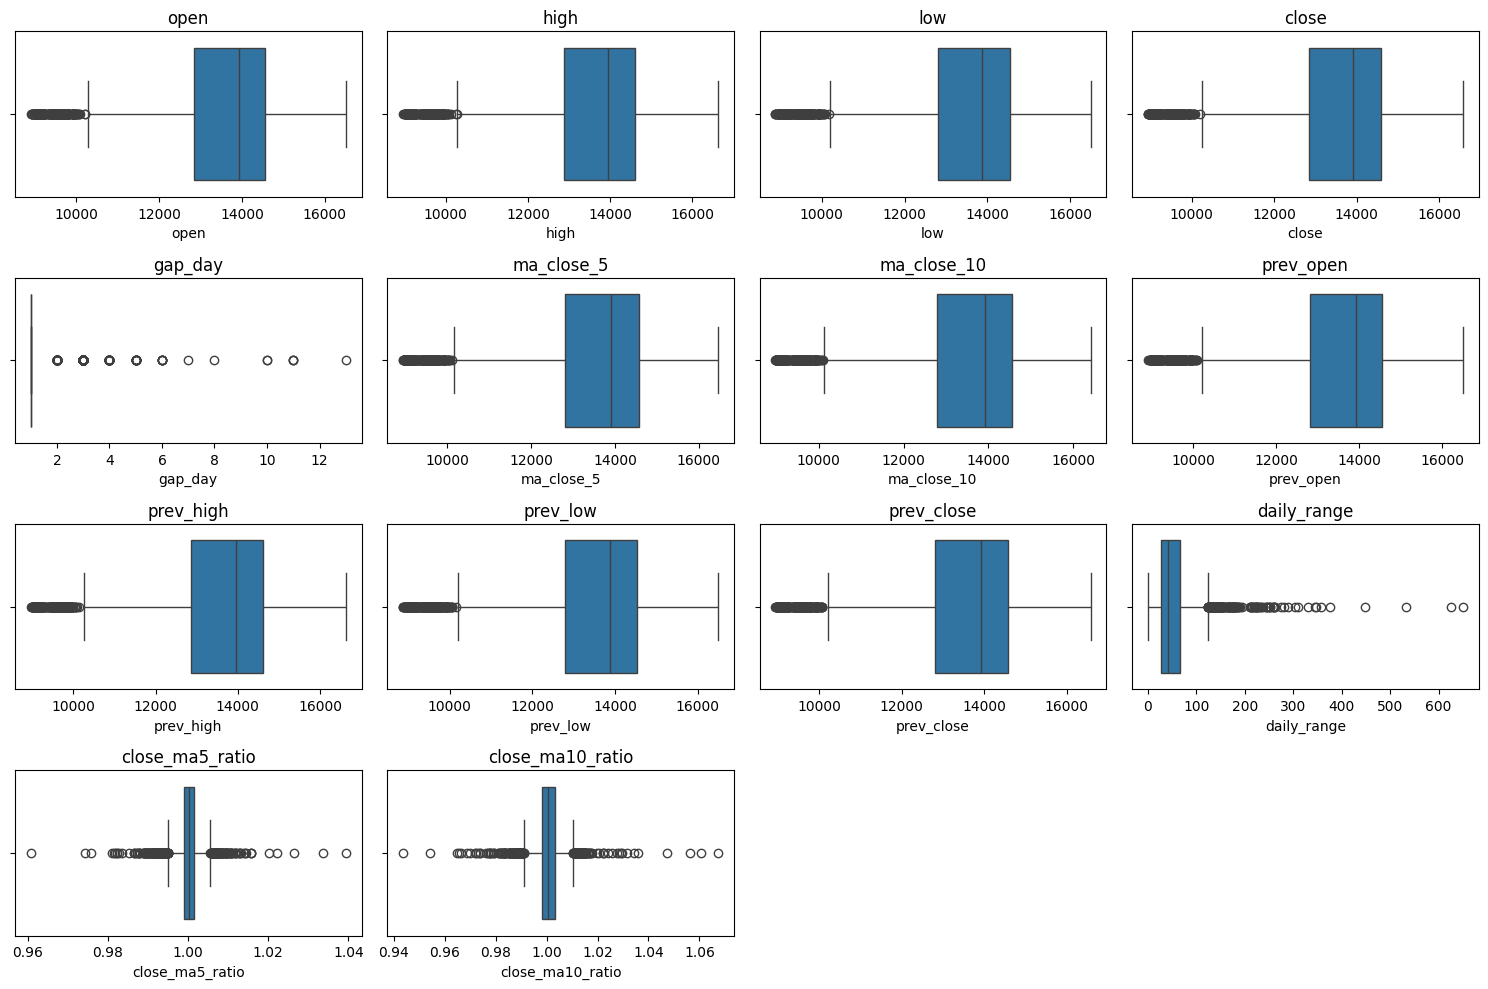

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for each relevant column
columns_to_check = [
    'open', 'high', 'low', 'close', 'gap_day', 
    'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 
    'prev_low', 'prev_close', 'daily_range', 'close_ma5_ratio', 'close_ma10_ratio'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

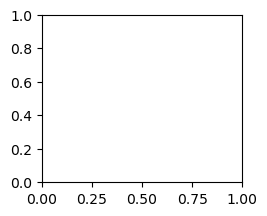

In [43]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index for plotting
df.set_index('date', inplace=True)

# Define columns to plot
columns_to_plot = [
    'open', 'high', 'low', 'close', 'gap_day', 
    'open_change', 'high_change', 'low_change', 'close_change',
    'ma_close_5', 'ma_close_10', 'prev_open', 'prev_high', 
    'prev_low', 'prev_close', 'daily_range', 'gap_change', 
    'close_ma5_ratio', 'close_ma10_ratio'
]

# Plot each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 5, i)  # Adjust the layout as necessary
    plt.plot(df.index, df[column], label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()

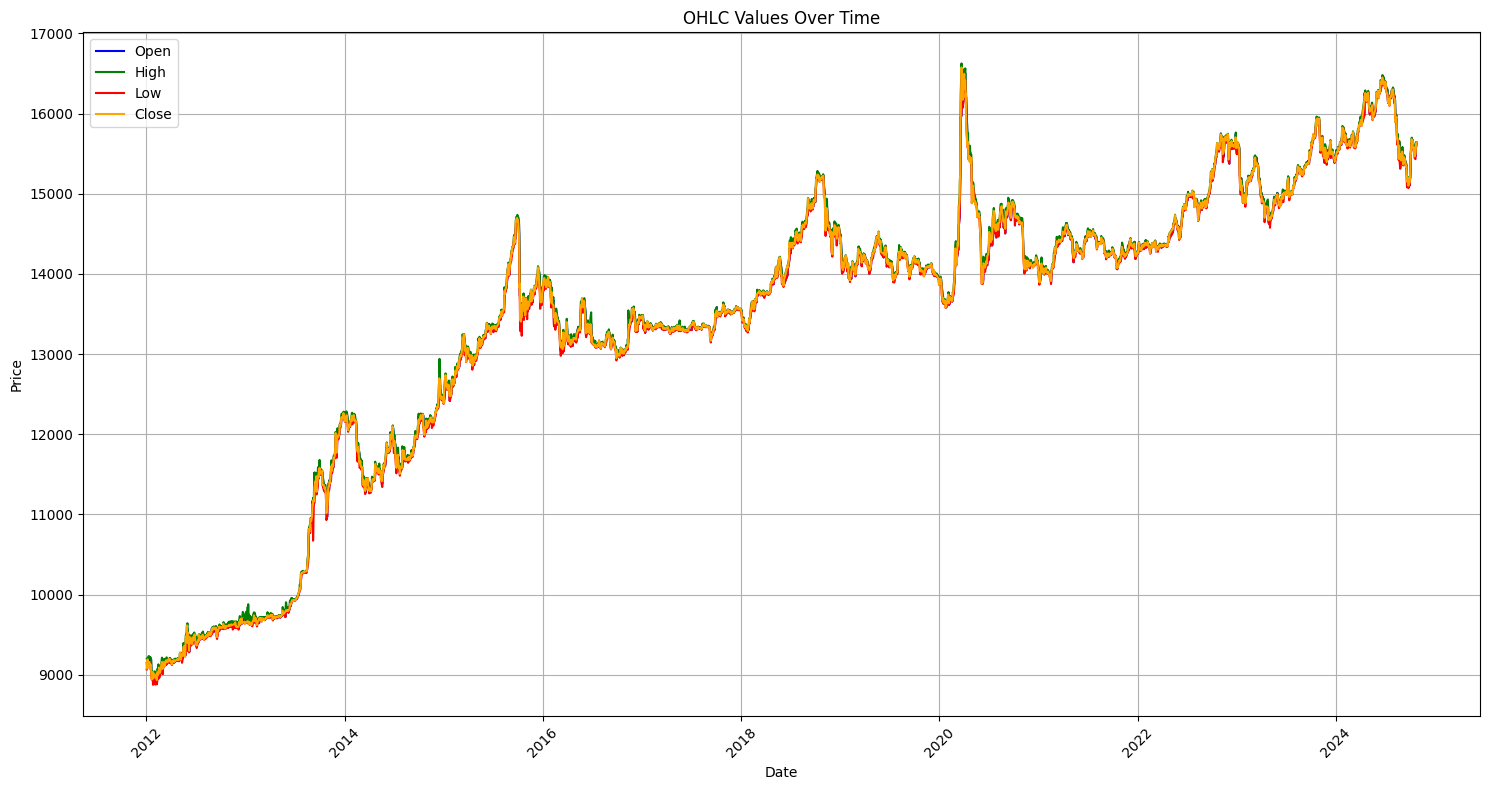

In [25]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot OHLC values
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['open'], label='Open', color='blue', linewidth=1.5)
plt.plot(df.index, df['high'], label='High', color='green', linewidth=1.5)
plt.plot(df.index, df['low'], label='Low', color='red', linewidth=1.5)
plt.plot(df.index, df['close'], label='Close', color='orange', linewidth=1.5)

# Customize the plot
plt.title('OHLC Values Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

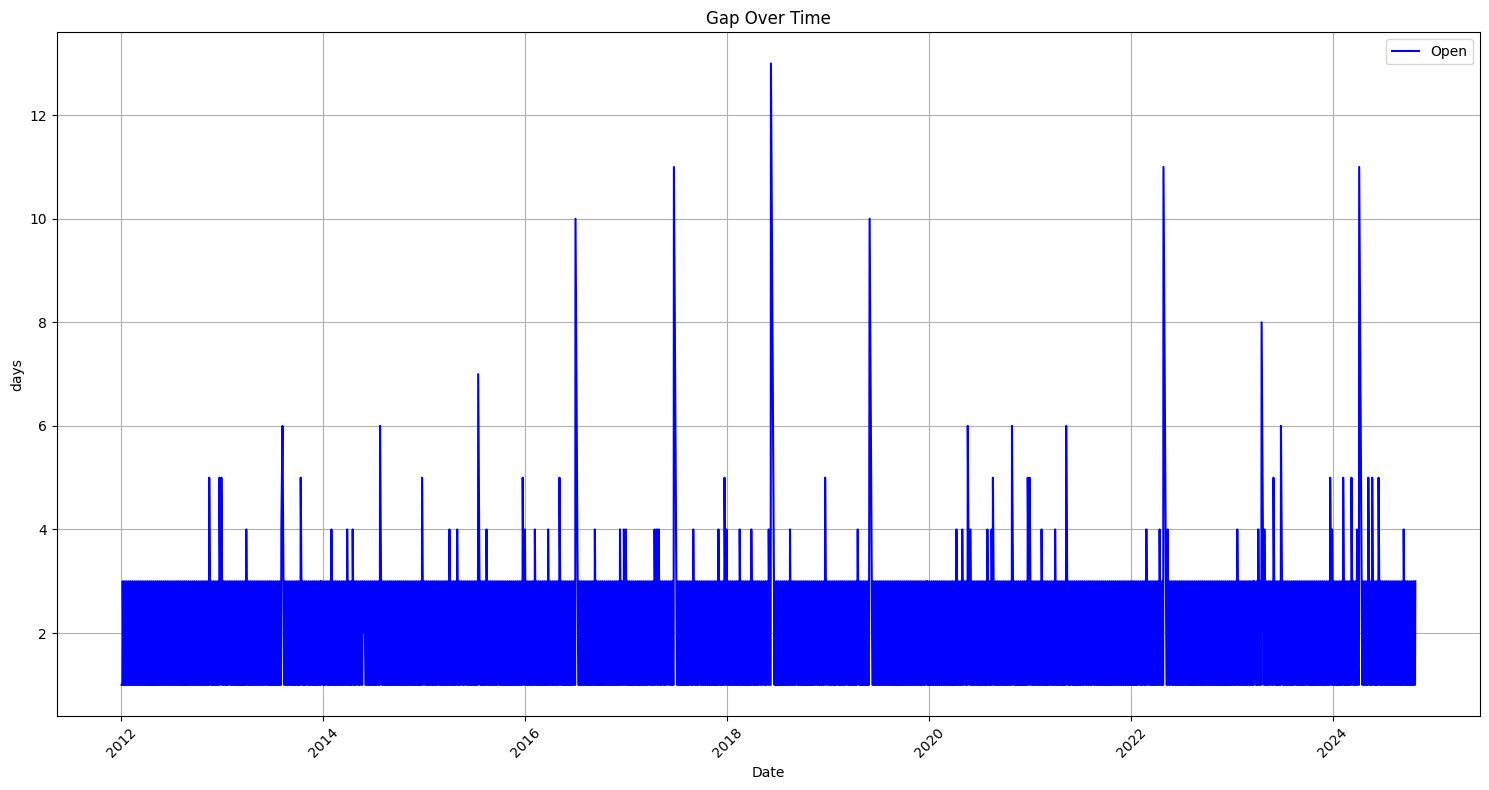

In [28]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot OHLC values
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['gap_day'], label='Open', color='blue', linewidth=1.5)

# Customize the plot
plt.title('Gap Over Time')
plt.xlabel('Date')
plt.ylabel('days')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Display the columns of the DataFrame
print(df.columns)

Index(['open', 'high', 'low', 'close', 'gap_day', 'next_close', 'open_change',
       'high_change', 'low_change', 'close_change', 'ma_close_5',
       'ma_close_10', 'prev_open', 'prev_high', 'prev_low', 'prev_close',
       'daily_range', 'gap_change', 'close_ma5_ratio', 'close_ma10_ratio'],
      dtype='object')
